"Unveiling DBSCAN: A Powerful Density-Based                                              Clustering Technique"

Name:- Monisha Munirathnam

Student ID:- 23038629


In [19]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [20]:
# Load the dataset
df = pd.read_csv("Wholesale customers data.csv")

In [21]:
# Step 3: Explore the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None

First 5 rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196    

In [22]:
# Step 4: Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [23]:
df['Fresh'] = np.log1p(df['Fresh'])
df['Milk'] = np.log1p(df['Milk'])

# Step 5: Scaling the data using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[['Fresh', 'Milk']])  # Scaling only the features used in DBSCAN


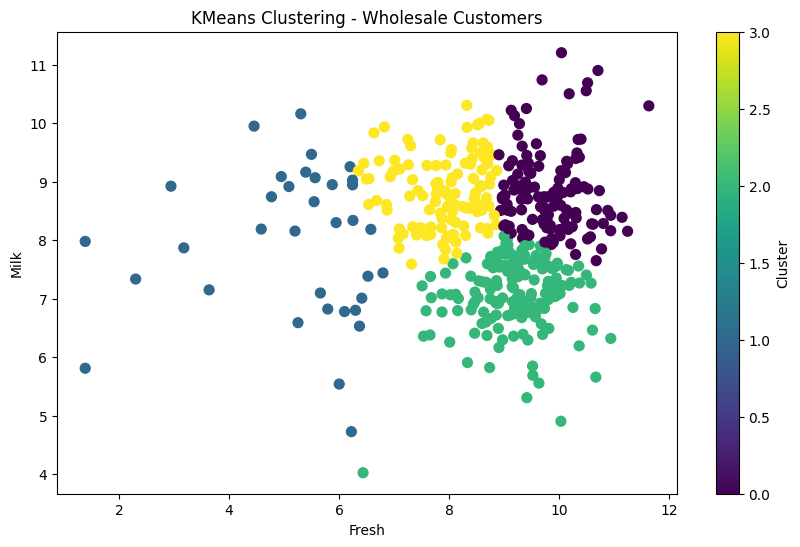

In [24]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=4)
kmeans_labels = kmeans_model.fit_predict(scaled_data)

# Add the KMeans cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Plot KMeans clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Fresh'], df['Milk'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering - Wholesale Customers')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.colorbar(label='Cluster')
plt.show()


In [25]:
# Step 6: Apply DBSCAN clustering
# Adjust eps and min_samples values based on the dataset
eps_value = 1
min_samples_value = 3

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(scaled_data)  # Assign cluster labels to 'labels'

In [26]:
# Step 7: Add DBSCAN cluster labels to the original dataframe
df['Cluster'] = labels

In [27]:
# Step 8: Evaluate Clustering Results
# Check number of clusters formed
print(f"\nNumber of clusters formed: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Number of noise points: {list(labels).count(-1)}")



Number of clusters formed: 1
Number of noise points: 1


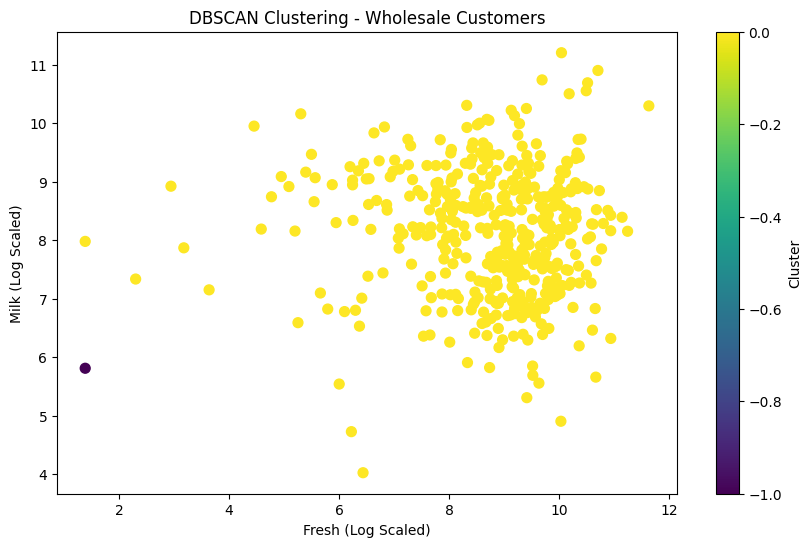

In [28]:
# Step 9: Visualizing the results
# Plotting the first two features ('Fresh' vs 'Milk')

plt.figure(figsize=(10, 6))
plt.scatter(df['Fresh'], df['Milk'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering - Wholesale Customers')
plt.xlabel('Fresh (Log Scaled)')
plt.ylabel('Milk (Log Scaled)')
plt.colorbar(label='Cluster')
plt.show()


In [29]:
# Calculate median of scaled data
median_scaled = np.median(scaled_data, axis=0)
print(f"Median of scaled data: {median_scaled}")

# Calculate IQR of original and scaled data
iqr_original = np.percentile(df[['Fresh', 'Milk']], 75, axis=0) - np.percentile(df[['Fresh', 'Milk']], 25, axis=0)
iqr_scaled = np.percentile(scaled_data, 75, axis=0) - np.percentile(scaled_data, 25, axis=0)
print(f"IQR of original data: {iqr_original}")
print(f"IQR of scaled data: {iqr_scaled}")

Median of scaled data: [-5.25838054e-16  0.00000000e+00]
IQR of original data: [1.68874462 1.54498581]
IQR of scaled data: [1. 1.]


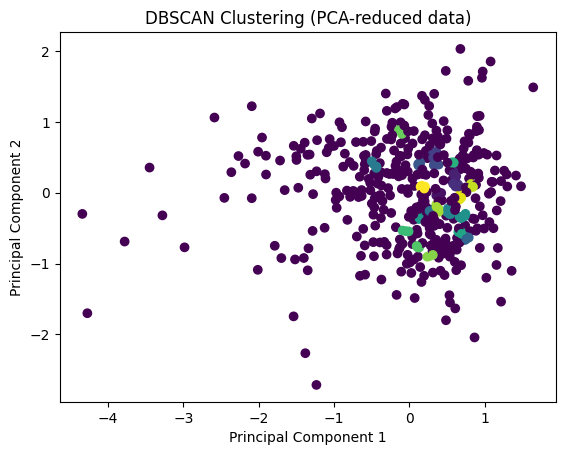

In [30]:
from sklearn.decomposition import PCA
# DBSCAN Before PCA (Higher eps for original data)
dbscan_before = DBSCAN(eps=1.0, min_samples=3)  # Larger eps for high-dimensional clustering
dbscan_labels_before_pca = dbscan_before.fit_predict(scaled_data)

# Apply PCA (Force Reduction to 2D)
pca = PCA(n_components=2)  # Reduce dimensions aggressively
scaled_data_after_pca = pca.fit_transform(scaled_data)

# DBSCAN After PCA (Much Smaller eps)
dbscan_after = DBSCAN(eps=0.05, min_samples=3)  # Very small eps to force new clustering
dbscan_labels_after_pca = dbscan_after.fit_predict(scaled_data_after_pca)

# Check if DBSCAN results changed
same_dbscan_output = np.array_equal(dbscan_labels_before_pca, dbscan_labels_after_pca)

# Visualize the result
# Replace 'pca_data' with 'scaled_data_after_pca' and 'labels_pca' with 'dbscan_labels_after_pca'
plt.scatter(scaled_data_after_pca[:, 0], scaled_data_after_pca[:, 1], c=dbscan_labels_after_pca, cmap='viridis')
plt.title('DBSCAN Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [31]:
# Assuming 'scaled_data' is your scaled data and 'labels' are the DBSCAN cluster labels
silhouette_avg = silhouette_score(scaled_data, labels)


# Assuming 'scaled_data' is your scaled data and 'kmeans_labels' are the KMeans cluster labels
# kmeans_labels is not yet defined. Assign cluster labels to 'kmeans_labels' after performing KMeans clustering.

silhouette_avg1 = silhouette_score(scaled_data, kmeans_labels)

print(f"Silhouette Score (DBSCAN): {silhouette_avg}")

print(f"Silhouette Score (KMeans): {silhouette_avg1}")

Silhouette Score (DBSCAN): 0.6936410269594862
Silhouette Score (KMeans): 0.37197497667430246


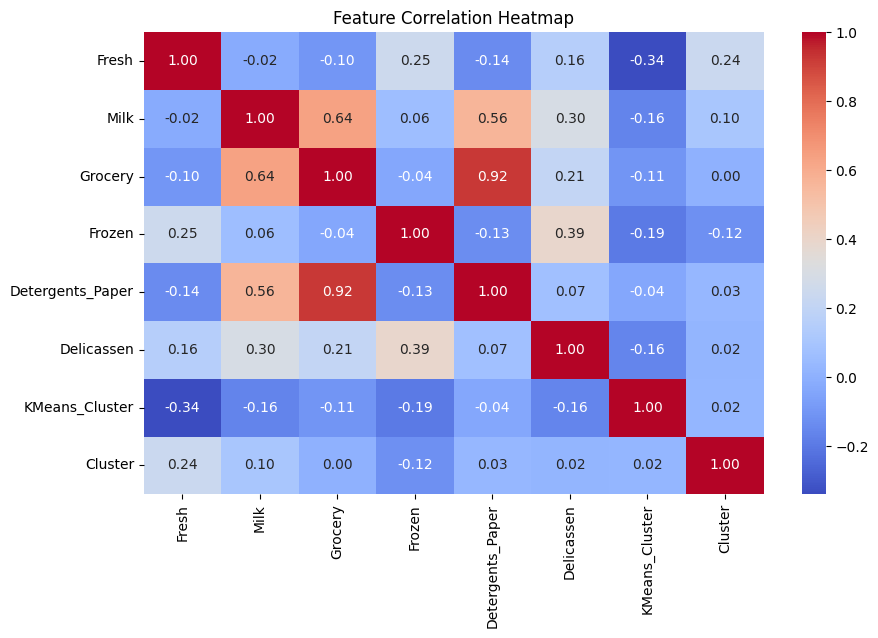

In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Channel', 'Region']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


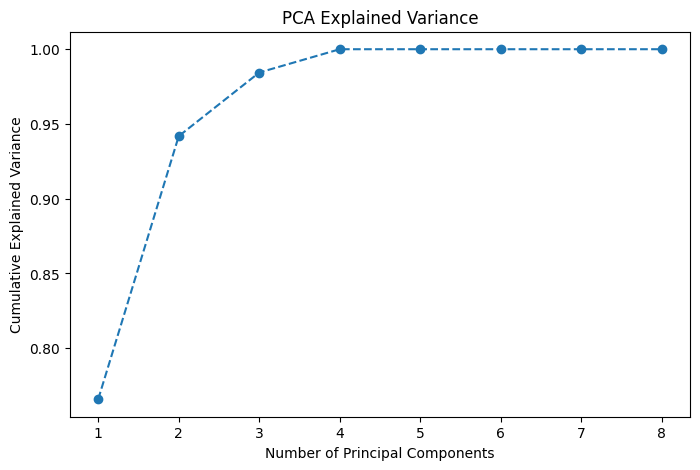

In [33]:
# PCA Explained Variance Plot
pca = PCA()
pca.fit(df.drop(columns=['Channel', 'Region']))
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()